# Clase 2: Visualización de problemas financieros

[Juan Diego Sánchez Torres](https://www.researchgate.net/profile/Juan_Diego_Sanchez_Torres), 

*Profesor*, [MAF ITESO](http://maf.iteso.mx/web/general/detalle?group_id=5858156)

+ Departamento de Matemáticas y Física
+ dsanchez@iteso.mx
+ Tel. 3669-34-34 Ext. 3069
+ Oficina: Cubículo 4, Edificio J, 2do piso

# 1. Repaso del uso de Pandas para descargar datos financieros

En primer lugar, para poder bajar precios de Yahoo, es necesario cargar algunos paquetes de Python. En este caso, el paquete principal será Pandas. También, se usarán el Scipy y el Numpy para las matemáticas necesarias y, el Matplotlib y el Seaborn para hacer gráficos de las series de datos.

In [2]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
from datetime import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#algunas opciones para Python
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

Una vez cargados los paquetes, es necesario definir los tickers de las acciones que se usarán, la fuente de descarga (Yahoo en este caso, pero también se puede desde Google) y las fechas de interés. Con esto, la función *DataReader* del paquete *pandas_datareader* bajará los precios solicitados.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte. El siguiente comando instala el paquete en Anaconda:
*conda install -c conda-forge pandas-datareader *

In [3]:
#Descargar datos de Yahoo! finance
#Tickers 
tickers = ['AA','AAPL','MSFT', '^GSPC']
# Fuente
data_source = 'yahoo'
# Fechas: desde 01/01/2014 hasta 12/31/2016.
start_date = '2014-01-01'
end_date = '2016-12-31'
# Usar el pandas data reader. El comando sort_index ordena los datos por fechas
assets = (web.DataReader(tickers, data_source, start_date, end_date)).sort_index('major_axis')
assets

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 756 (major_axis) x 4 (minor_axis)
Items axis: Adj Close to Volume
Major_axis axis: 2014-01-02 00:00:00 to 2016-12-30 00:00:00
Minor_axis axis: AA to ^GSPC

**Nota**: Para descargar datos de la bolsa mexicana de valores (BMV), el ticker debe tener la extensión MX. 
Por ejemplo: *MEXCHEM.MX*, *LABB.MX*, *GFINBURO.MX* y *GFNORTEO.MX*.

# 2. Gráficos útiles de los rendimientos

Se calculan los rendimientos de todos los activos considerados. De nuevo, para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como
$$
r_t=\ln(1+R_t)
$$
donde $R_t$ es el rendimiento simple. Es fácil darse cuenta que $r_t=\ln\left(\frac{S_t}{S_{t-1}}\right)$.

In [4]:
allA=assets['Adj Close']
R = ((allA - allA.shift(1))/allA)[1:]
r=np.log(1+R)

In [5]:
R.describe()

              AA       AAPL       MSFT      ^GSPC
count  7.550e+02  7.550e+02  7.550e+02  7.550e+02
mean  -1.212e-04  4.710e-04  6.784e-04  2.299e-04
std    2.461e-02  1.515e-02  1.479e-02  8.469e-03
min   -1.290e-01 -8.687e-02 -1.020e-01 -4.103e-02
25%   -1.347e-02 -6.636e-03 -6.602e-03 -3.554e-03
50%    0.000e+00  7.544e-04  3.471e-04  2.881e-04
75%    1.224e-02  8.629e-03  7.710e-03  4.736e-03
max    1.167e-01  7.577e-02  9.463e-02  3.757e-02

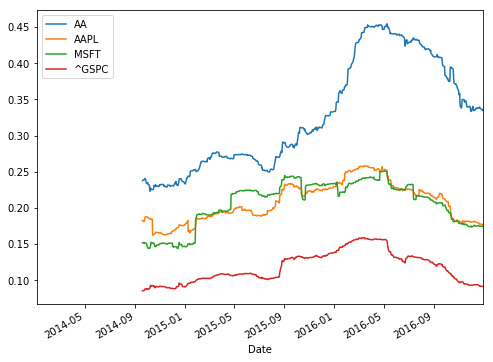

In [6]:
min_periods = 180
vol = R.rolling(window=min_periods).std()*np.sqrt(min_periods)
vol.plot(figsize=(8, 6));

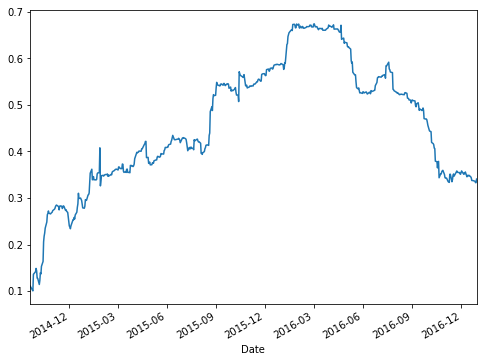

In [7]:
rolling_corr =R['AAPL'].rolling(window=180).corr(R['MSFT']).dropna()
rolling_corr.plot(figsize=(8, 6));

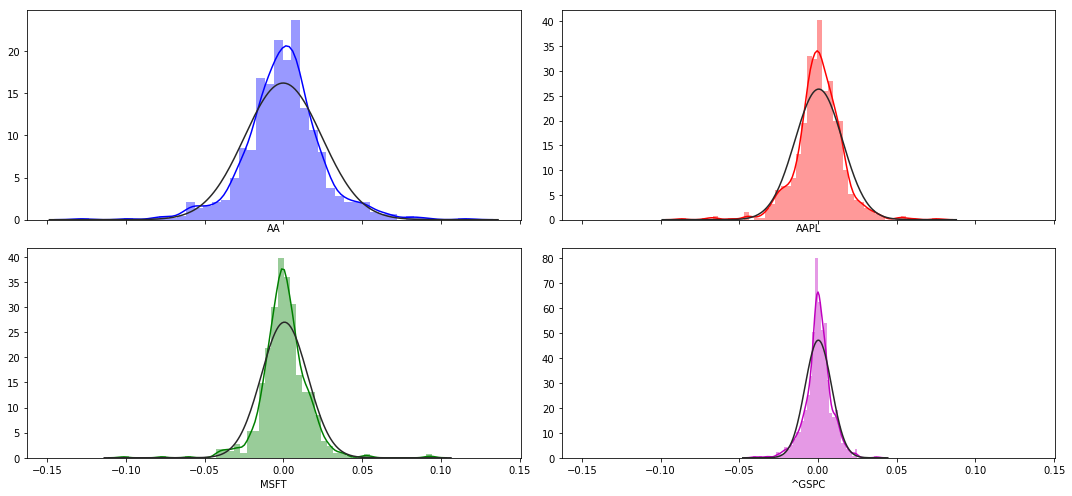

In [7]:
f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=True)
# Plot a simple histogram with binsize determined automatically
sns.distplot(R['AA'], color="b", fit=stats.norm, norm_hist=True, ax=axes[0, 0])
sns.distplot(R['AAPL'], color="r", fit=stats.norm, norm_hist=True, ax=axes[0, 1])
sns.distplot(R['MSFT'], color="g", fit=stats.norm, norm_hist=True, ax=axes[1, 0])
sns.distplot(R['^GSPC'], color="m", fit=stats.norm, norm_hist=True, ax=axes[1, 1])
plt.tight_layout()

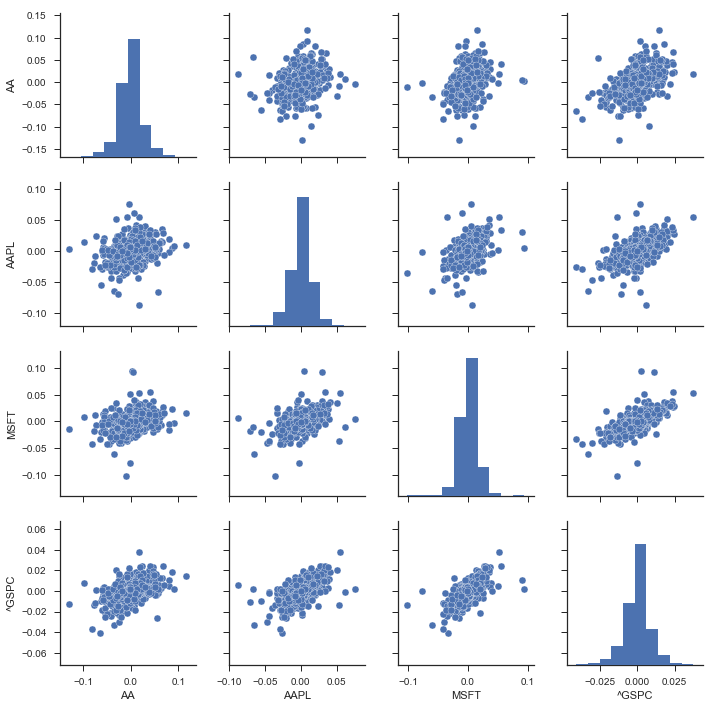

In [8]:
sns.set(style="ticks")
sns.pairplot(R);

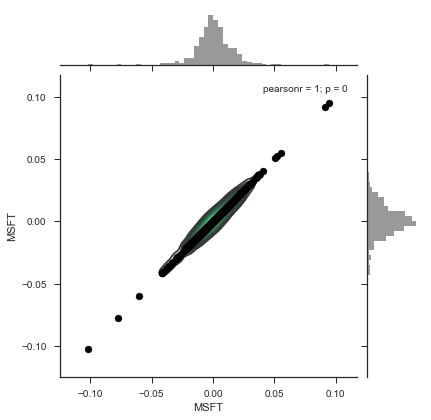

In [9]:
sns.jointplot("MSFT", "MSFT",data=R, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

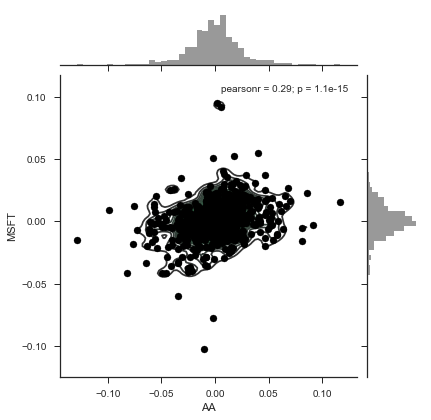

In [10]:
sns.jointplot("AA", "MSFT",data=R, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

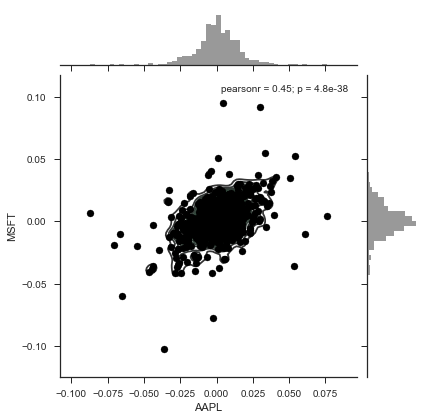

In [11]:
sns.jointplot("AAPL", "MSFT",data=R, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

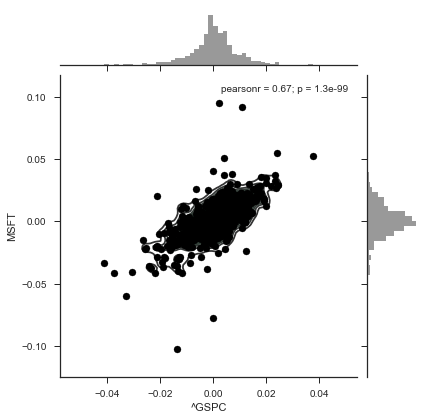

In [12]:
sns.jointplot("^GSPC", "MSFT",data=R, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

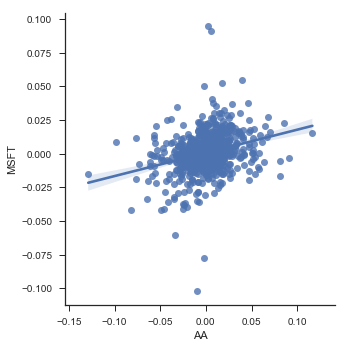

In [13]:
sns.lmplot(x="AA", y="MSFT", truncate=True, size=5, data=R);

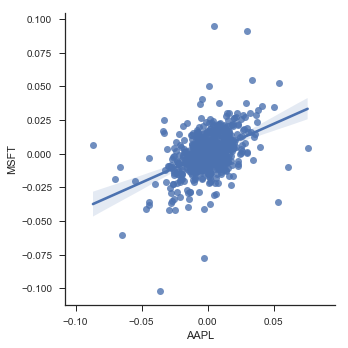

In [14]:
sns.lmplot(x="AAPL", y="MSFT", truncate=True, size=5, data=R);

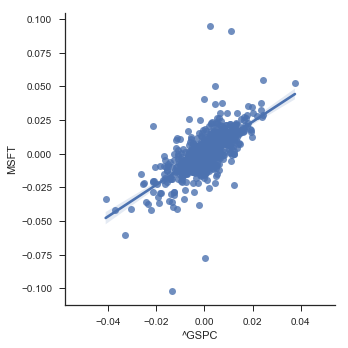

In [15]:
sns.lmplot(x="^GSPC", y="MSFT", truncate=True, size=5, data=R);

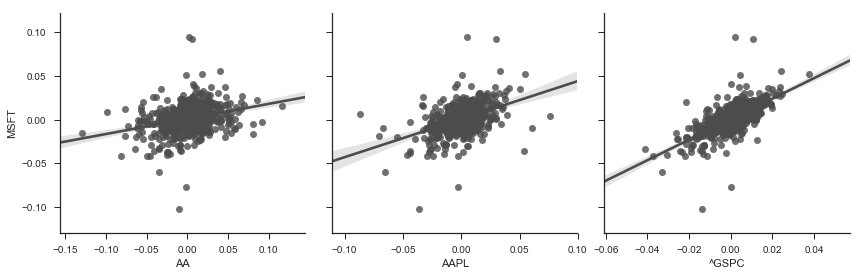

In [16]:
g = sns.PairGrid(R, y_vars=["MSFT"], x_vars=["AA", "AAPL", "^GSPC"], size=4)
g.map(sns.regplot, color=".3");